# CNN Model and Nearest Neighbors


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from tensorflow.keras.applications import ResNet101V2
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os

2024-12-05 23:41:43.820789: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 23:41:43.830581: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 23:41:43.840414: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 23:41:43.843055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 23:41:43.850134: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # Added validation split

training_set = train_datagen.flow_from_directory('dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('dataset',
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2416 images belonging to 10 classes.
Found 599 images belonging to 10 classes.


In [3]:
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = True

for layer in base_model.layers[:249]:  # Freeze first 249 layers
    layer.trainable = False
for layer in base_model.layers[249:]:  # Unfreeze layers from 249 onwards
    layer.trainable = True

# Add new fully connected layers for classification
new_classifier = Sequential([
    GlobalAveragePooling2D(),  # Add a GlobalAveragePooling layer to reduce dimensions
    Dense(1024, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer (adjust number of classes)
])

# Combine the ResNet101 base model and the new classifier
cnn_model = Sequential([
    base_model,  # Add ResNet101 as the base
    new_classifier  # Add the new classifier on top
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the new dataset (only the fully connected layers will be trained)
history = cnn_model.fit(training_set, validation_data=validation_set, epochs=10)

I0000 00:00:1733420505.720292 1565578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733420505.737529 1565578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733420505.737567 1565578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733420505.740200 1565578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733420505.740231 1565578 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Epoch 1/10


I0000 00:00:1733420519.990431 1565911 service.cc:146] XLA service 0x7f8154004370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733420519.990477 1565911 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-12-05 23:42:00.352100: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-05 23:42:01.821023: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-12-05 23:42:05.174825: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_23241', 32 bytes spill stores, 32 bytes spill loads

2024-12-05 23:42:05.276197: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memo

76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.8370 - loss: 0.6169

2024-12-05 23:42:46.839712: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2985', 188 bytes spill stores, 188 bytes spill loads

2024-12-05 23:42:50.677883: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2978', 4 bytes spill stores, 4 bytes spill loads

2024-12-05 23:42:50.956094: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2978', 12 bytes spill stores, 12 bytes spill loads

2024-12-05 23:42:51.072030: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2978', 36 bytes spill stores, 36 bytes spill loads

2024-12-05 23:42:51.239647: I external/local_xla/xla/stream_

76/76 ━━━━━━━━━━━━━━━━━━━━ 67s 492ms/step - accuracy: 0.8380 - loss: 0.6132 - val_accuracy: 0.1452 - val_loss: 475.9310
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 201ms/step - accuracy: 0.9707 - loss: 0.1389 - val_accuracy: 0.1452 - val_loss: 64013.3906
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 206ms/step - accuracy: 0.9828 - loss: 0.0798 - val_accuracy: 0.3155 - val_loss: 27408.0977
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - accuracy: 0.9737 - loss: 0.2097 - val_accuracy: 0.8197 - val_loss: 2.6834
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.9713 - loss: 0.1733 - val_accuracy: 0.2588 - val_loss: 648.1429
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 206ms/step - accuracy: 0.9805 - loss: 0.0734 - val_accuracy: 0.9516 - val_loss: 0.1834
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step - accuracy: 0.9950 - loss: 0.0204 - val_accuracy: 0.8230 - val_loss: 2.4165
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.9882 - loss: 0.0933 - val_acc

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Function to extract features from ResNet101 base (without the new fully connected layers)
def extract_features_fixed(image_path, base_model):
    img = load_img(image_path, target_size=(224, 224))  # Load image (InceptionV3 uses 224x224)
    img_array = img_to_array(img) / 255.0  # Preprocess the image (normalize)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    features = base_model.predict(img_array)  # Extract features from InceptionV3 base
    return features.flatten()  # Flatten the features to 1D

# Function to create feature list for nearest neighbors
def create_feature_list(dataset_dir, base_model):
    features_list = []
    image_paths = []
    
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(subdir, file)
                features = extract_features_fixed(file_path, base_model)
                features_list.append(features)
                image_paths.append(file_path)
    
    return np.array(features_list), image_paths

# Create feature list for the whole dataset
features_list, image_paths = create_feature_list("dataset", base_model)

2024-12-05 23:45:26.054283: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng56{k2=1,k12=1,k13=0,k14=3,k15=0,k17=128,k18=0,k22=0,k23=0} for conv (f32[1,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,256,28,28]{3,2,1,0}, f32[128,256,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-12-05 23:45:26.055609: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.511387104s
Trying algorithm eng56{k2=1,k12=1,k13=0,k14=3,k15=0,k17=128,k18=0,k22=0,k23=0} for conv (f32[1,128,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,256,28,28]{3,2,1,0}, f32[128,256,1,1]{3,2,1,0}), window={size=1x1}, dim_labels=bf01_oi01->bf01, custom_call_target="__c

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Nearest images to dataset/watch/image_0013.jpg:
dataset/watch/image_0013.jpg - Distance: 0.0000
dataset/watch/image_0199.jpg - Distance: 0.1035
dataset/watch/image_0239.jpg - Distance: 0.1064
dataset/watch/image_0151.jpg - Distance: 0.1095
dataset/watch/image_0141.jpg - Distance: 0.1130
dataset/watch/image_0227.jpg - Distance: 0.1169
dataset/watch/image_0073.jpg - Distance: 0.1224
dataset/watch/image_0033.jpg - Distance: 0.1233
dataset/watch/image_0209.jpg - Distance: 0.1249
dataset/watch/image_0062.jpg - Distance: 0.1339


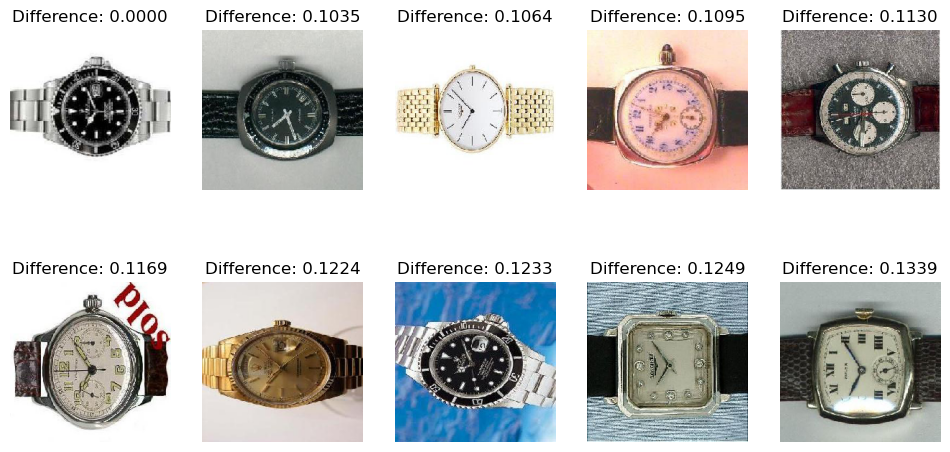

In [7]:
# Function to find the nearest images based on extracted features
def find_nearest_images(image_path, base_model, n_neighbors=10):
    # Extract features for the input image
    image_features = extract_features_fixed(image_path, base_model)
    
    # Using NearestNeighbors to find the nearest images
    neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    neighbors.fit(features_list)
    
    distances, indices = neighbors.kneighbors([image_features])
    
    # Print the nearest images and their distance
    print(f"Nearest images to {image_path}:")
    for i in range(n_neighbors):
        print(f"{image_paths[indices[0][i]]} - Distance: {distances[0][i]:.4f}")
    
    # Optionally, plot the nearest images
    plt.figure(figsize=(12, 6))
    for i in range(n_neighbors):
        img = load_img(image_paths[indices[0][i]], target_size=(224, 224))
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Difference: {distances[0][i]:.4f}")
    plt.show()

# Example usage: Finding nearest images
find_nearest_images('dataset/watch/image_0013.jpg', base_model, n_neighbors=10)